# ECUACIONES DIFERENCIALES PARCIALES

### Pofesores: Oscar Reula & Manuel Tiglio

## Solución correspondiente a dos hemisferios a potenciales opuestos

Aquí resolveremos numéricamente el problema de una cáscara con sus hemisferios a potenciales opuestos. La solución analítica se la puede encontrar, por ejemplo en: http://www.famaf.unc.edu.ar/~reula/Docencia/Electromagnetismo/electrodynamics.pdf, página 81.
 
Debido a la simetría axial, la solución se puede expresar como una suma de polinomios de Legendre $ P_{n}(x)$, donde $ x = \cos(\theta)$ y potencias de r, la coordenada radial.
$$ \phi(x,r) = \sum_{n = 0}^{\infty}A_n r^{-(n+1)}P_n(x)$$.

Supondremos la cáscara tiene radio a y reescalaremos la variable radial como $ r \to \frac{r}{a}$, de esa manera queda adimensional la cáscara a radio unidad.

Debemos cálcular ahora los coeficientes $A_n$. Notemos que $ A_{2n}$ $ \forall $ $n$ ya que 
la cáscara tiene simetría impar ante cambios $ x \to -x $ y por lo tanto ninguno de los polinomios pares puede contribuir.

Los impares se calculan imponiendo la condición de contorno: $
\phi(x,1) = V_0 \theta(x) $, donde $\theta$ es la función escalón. 
Tomaremos $ V_0 $ en lo que sigue. 
Siempre se puede reescalear la solución al final.

Tenemos así que (recordando que la cáscara está a $r=1$),
$$ \theta(x) = \sum_{n=0}^{\infty} A_n P_n(x),$$ 
multiplicando por $P_{m}(x)$ ambos lados e integrando en $[-1,1]$ obtenemos,$$ \int_{-1}^{1} P_n(x) \theta(x) dx = \frac{2}{2n+1} A_n $$
Haciendo solo las integrales entre $[0,1]$ y multiplicando por $2$, (ya que las funciones son impares) obtenemos,
$$ A_n = (2n+1) \int_0^1 P_n(x) dx \quad \mbox{impar}.$$

Haremos estos cálculos analíticamente y luego graficaremos la solución.

Para ilustrar el caso donde es conveniente hacer las integrales en forma numérica consideraremos el caso, $$ \phi(x,1) = V_0 \theta(x) e^{-x^2}.$$

Los coeficientes vendrán dados por: $$ \theta(x) e^{-x^2} = \sum_{n=0}^{\infty} B_n P_n(x),$$
$$ B_n = (2n+1) \int_0^1 P_n(x) e^{-x^2} dx \quad \mbox{impar}.$$

Estos los calcularemos numéricamente.

Primero definimos todo lo necesario de las librerías de Python.

In [1]:
%matplotlib inline
#%matplotlib notebook
#from sympy import * ## El asterisco significa importar todo de la librería.
from sympy import simplify, diff, integrate, Integral, Sum, lambdify, legendre ## sympy contiene en
# sus librerías las operaciones con las que trabajamos.
import sympy.functions as sp 
import numpy as np
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import animation, rc
from IPython.display import HTML
#init_printing(use_unicode=True)
#x, y, z, u, v, r = symbols('x y z, u, v, r')

from sympy.abc import x, y, r, n, k, m ## sympy.abc Este módulo exporta las letras
# latínas y griegas como símbolos.

#k, m, n = symbols('k m n', integer=True)
#f, step, potential = symbols('f step potential', cls=Function)
#var('n m x')
#theta = Symbol("theta")
#phi = Symbol("phi")

 Luego probamos que las definiciones funcionan correctamente con algunos ejemplos:

In [2]:
print(2+3), print(2*3), print(9**(1/2))
#print(sp.legendre(3,x))
sp.legendre(3,x)   #sp se refiere a simpy.functions

5
6
3.0


5*x**3/2 - 3*x/2

In [3]:
sp.legendre(2,x)  #sp se refiere a simpy.functions

3*x**2/2 - 1/2

In [4]:
sp.laguerre(2,x) # sp se refiere a simpy.functions

x**2/2 - 2*x + 1

 Podemos por ejemplo integrarlos (o diferenciarlos, ó hacer otras operaciones con ellos), por ejemplo:

In [5]:
Integral(sp.legendre(3,x),x) # Muestra explicitamente la integral, Sintaxis: Integral(función,variable)

Integral(5*x**3/2 - 3*x/2, x)

In [6]:
integrate(sp.legendre(3,x),x) #integrate es una función que importamos desde sympy, que realiza la integración.

5*x**4/8 - 3*x**2/4

In [7]:
integrate(sp.laguerre(2,x),x) #integrate es una función que importamos desde sympy

x**3/6 - x**2 + x

Hagamos algunas derivadas e integrales definiendo algunas funciones simples.

In [8]:
f = (2*x + 1)*(x**3 + 2) ## Ojo, no pusimos f(x), para ello necesitamos 
# definir la función.
d  = diff(f, x)
d

2*x**3 + 3*x**2*(2*x + 1) + 4

In [9]:
from sympy.abc import a 
f = (a*x + 1)+(x**3 + 2)
d = diff(f, x)
d

a + 3*x**2

In [10]:
f = (2*x + 1)
# Integral(f, x)
d = integrate(f,x)
d

x**2 + x

In [11]:
from sympy import sin, pi
print(integrate(sin(x),(x,0,pi)))
integrate(sin(x),(x,0,pi))

2


2

In [12]:
print(integrate(x**2,(x,0,3)))
integrate(x**2,(x,0,3))

9


9

In [13]:
from sympy.integrals import laplace_transform
from sympy.abc import t,s 
laplace_transform(t**a,t,s)

(s**(-a)*gamma(a + 1)/s, 0, re(a) > -1)

 Por ejemplo podemos probar una de las fórmulas más útiles para hacer integrales usando los polinomios de Legendre:
 $$ \frac{dP_{l+1}}{dx} - \frac{dP_{l-1}}{dx} - l(l+1)P_{l} = 0. $$ Solo se puede constatar la fórmula para valores particulares (no la sabe simplificar completamente). Poner cualquier valor entero positivo ($>1$) para k.

In [14]:
k = 5
diff(sp.legendre(k+1,x),x) - diff(sp.legendre(k-1,x),x) - (2*k+1)*sp.legendre(k,x)
# diff es una función importada desde sympy que deriva 

0

Grafiquemos ahora algunos polinomios de Legendre. Para ello primero los transformamos en funciones propiamente dichas (y no símbolos) y lo hacemos adaptados para ser graficados con las facilidades numéricas the Python (numpy).

In [15]:
## La función numpy.linspace genera un array NumPy 
## formado por n números equiespaciados entre dos dados. Su sintaxis es:
## numpy.linspace(valor-inicial, valor-final, número de valores)
m = np.linspace(0, 40, 5)
m

array([ 0., 10., 20., 30., 40.])

### Numpy

NumPy es una librería en el lenguaje de programación de Python, que le agrega mayor soporte para vectores y matrices, constituyendo una biblioteca de funciones matemáticas de alto nivel para operar con esos vectores o matrices.

Muy útil para arreglos.

### subs & evalf / lambdify

subs y evalf son buenas si deseamos hacer evaluaciones simples, pero si lo que buscamos
es evaluar una función (expresión) en muchos puntos, existen maneras mucho más eficientes.
Por ejemplo, si queremos evaluar una expresión en mil puntos, usando SymPy será mucho más
lento de lo necesario, especificamente si solo nos preocupa la precisión de máquina. En vez, 
podemos usar las librerías de NumPy y SciPy. 

La manera más simple de convertir una expresión de SymPy a una expresión que pueda ser numéricamente
evaluada es usar la función lambdify. lambdify actúa como una función lamba, excepto que
convierte los nombres SymPy a los nombres de la librería númerica dada, usualmente NumPy. Por ejemplo:

In [16]:
## Vamos a ver que hace lambdify

from sympy.abc import x,y
f = pow(x,2) + y ## pow(x,2) = x**2
values = {x: 4, y: 4}
print(f.evalf())
f.evalf(subs=values)

x**2 + y


20.0000000000000

In [17]:
import numpy as np
# b = np.arange(-3, 3, 1)
# print(b)

a = np.arange(10)
print(a)
## sintaxis: numpy.arange(start, stop, step, dtype=None)
## numpy.arange: Devuelve valores espaciados uniformemente dentro de un intervalo dado.

import sympy.functions as sp
g = sp.sin(x)
print(g)
f = lambdify(x, g, "numpy") ## Evalúa la función en varios puntos, [sin(0), sin(1), ... ]
## Syntax: lambdify(variable, expression, library)
# print(f)
print(f(a)) 
#f(a)

[0 1 2 3 4 5 6 7 8 9]
sin(x)
[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849]


### numpy.linspace

Sintaxis: numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)

Devuelve valores espaciados uniformemente dentro de un intervalo dado.

### Dos Formas de Graficar

In [18]:
## Vamos a hacer una gráfica, para ello damos los valores
## que la función toma en los ejes.

import numpy as np

m = np.linspace(0,1,5) # sintaxis:  numpy.linspace(start, stop, num=50) 
print(m)

## Veamos la diferencia entre linspace y np.arange

n = np.arange(0, 1.25, 0.25, dtype = float) # sintaxis: numpy.arange(start, stop, step, dtype=None)
print(n)

x_vals = np.linspace(-1,1,200)
#print(x_vals)

f = lambdify(x, sp.legendre(8,x),"numpy") #convierte la expresión en una función llamable que acepta
## numpy arrays
l_vals = f(x_vals)
#print(l_vals)

[0.   0.25 0.5  0.75 1.  ]
[0.   0.25 0.5  0.75 1.  ]


#### Primera Manera

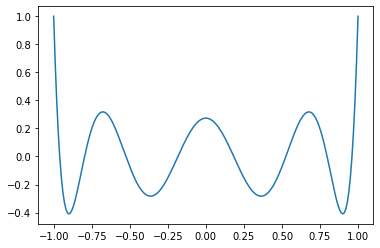

In [19]:
## El primer método utiliza: 

import matplotlib.pyplot as mpl
mpl.plot(x_vals,l_vals) # Con esta orden se muestra la grafica

#### Segunda Manera


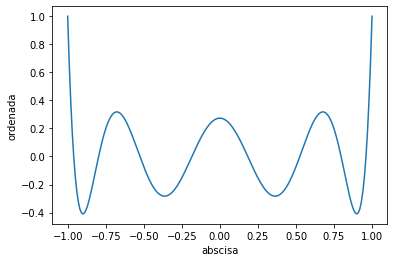

In [20]:
##  Para el segundo método exportamos:

from pylab import *
plt.plot(x_vals,l_vals)
plt.xlabel("abscisa")   # Inserta el título del eje X
plt.ylabel("ordenada")   # Inserta el título del eje Y
plt.show()

 Primero hacemos el caso analítico: Las integrales se pueden hacer o bien analíticamente o bien numéricamente. En el caso que sigue tomamos una grilla de L puntos e integramos numéricamente. Esto siempre funciona, pero hay que tener cuidado que la aproximación sea buena, en particular para polinomios de orden alto hay que tomar intervalos de grilla bien pequeños.

In [21]:
# L = 200 # números de puntos de grilla, ajustar al grado del polinomio, se necesitan al menos 10 puntos 
# por cada l.
L = 100

In [22]:
Integral(sp.legendre(3,x),(x,0,1))


Integral(5*x**3/2 - 3*x/2, (x, 0, 1))

### Integrales Numéricas

In [23]:
Integral(sp.legendre(3,x),(x,0,1)).as_sum(L).evalf()

# as_sum(L) hace una integral por trapecios con L puntos, pero la expresa como una fracción
# evalf(N) evalúa la expresión con N dígitos significativos (8 por defecto).

-0.125031250000000

In [24]:
Integral(sp.legendre(3,x),(x,0,1)).as_sum(L)

# as_sum(L) hace una integral por trapecios con L puntos, pero la expresa como una fracción
# evalf(N) evalúa la expresión con N dígitos significativos (8 por defecto).

-4001/32000

También en algunos casos las integrales se pueden hacer en forma exacta.

### Integrales Exactas

In [25]:
print(Integral(sp.legendre(3,x),(x,0,1)).evalf(5)) #para expresar la
# solución como número decimal.

Integral(sp.legendre(3,x),(x,0,1)).doit()       #para expresar la
## solución como fracción.

-0.12500


-1/8

Primero hacemos un cálculo algebraico, en el caso que el potencial viene dado por $\theta(x)$. Calculamos los coeficientes (solo para los n impares, $n=2m+1$).

In [26]:
from sympy.abc import l, m
l = 3
2*(2*l+1)+1 # = 2*(2l+1)+1

15

In [27]:
A = lambda n: (2*(2*n+1)+1)*Integral(sp.legendre(2*n+1,x),(x,0,1)).doit()

In [28]:
A(3)

-75/128

In [29]:
A(15).evalf(5)

-0.28441

Contruimos el potencial en la frontera (r=1) para saber que las condiciones de contorno se satisfacen aproximadamente.

In [30]:
N=15 # número de términos en la suma
#from sympy.abc import m
#step_approx=lambdify(x,Sum(A(m).doit()*sp.legendre(2*m+1,x),(m,0,N)).doit(),"numpy")
step_approx=lambdify(x,Sum(A(m).evalf()*sp.legendre(2*m+1,x),(m,0,N)).doit(),"numpy")

In [31]:
#Sum es una función de sympy. Recordar que m es un símbolo que también importamos desde simpy.
#Un ejemplo para entender la expresión de arriba es
from sympy.abc import p    #notar que ya importamos m antes
Sum(p, (p,0,3))

Sum(p, (p, 0, 3))

 Graficamos la aproximación y comparamos con la solución exacta. Note que si ponemos muchos términos la solución no converge.

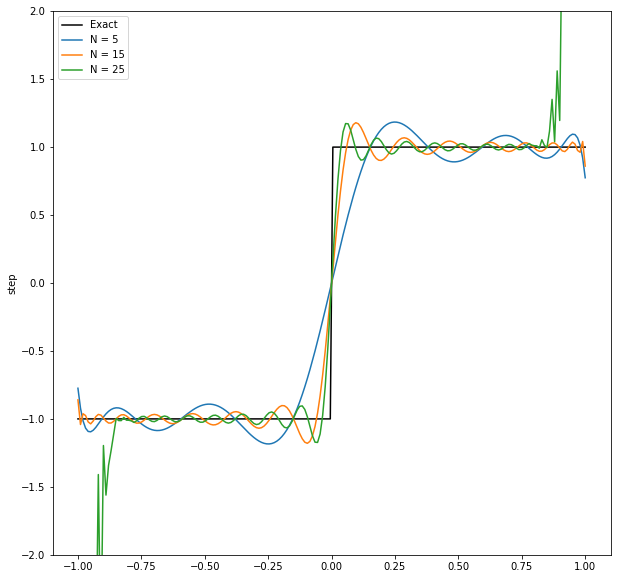

In [38]:
# import matplotlib.pyplot as mpl

fig = mpl.figure(figsize = (10,10))
step = lambdify(x,sp.sign(x),"numpy")
f_vals = step(x_vals)
mpl.plot(x_vals, f_vals, color = "k", label = "Exact")
for N in [5,15,25]:
    x_vals = np.linspace(-1, 1, 200)
    step_approx = lambdify(x,Sum(A(m).evalf()*sp.legendre(2*m+1,x),(m,0,N)).doit(),"numpy")
    z_vals = step_approx(x_vals)
    mpl.plot(x_vals, z_vals, label = f"N = {N:d}")
    mpl.ylabel("step")

mpl.ylim(-2,2) #seteamos los límites del ploteo
mpl.legend() #para ver los labels
mpl.show()

Generamos ahora el potencial completo:

In [39]:
N = 15
potential = lambdify((x,r),Sum(A(m).evalf()*sp.legendre(2*m+1,x)*r**(-2*(m+1)),(m,0,N)).doit(),"numpy")

 Graficamos la aproximación a la función escalón que calculamos:

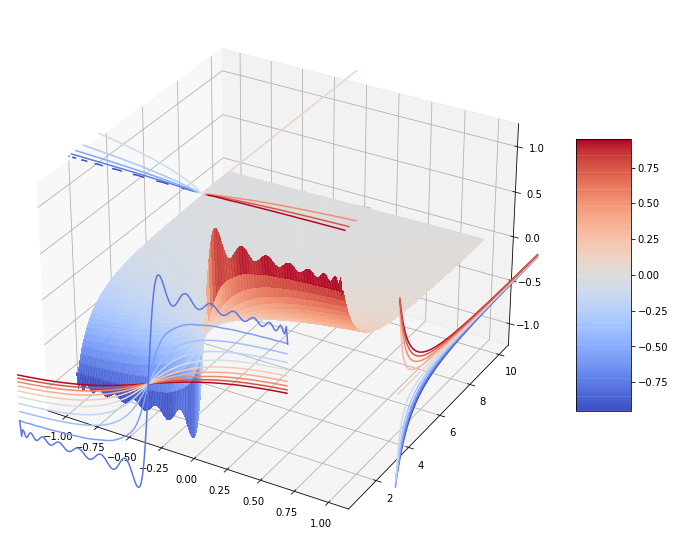

In [40]:
y_vals = np.linspace(1,10,200)
X,Y = np.meshgrid(x_vals,y_vals)
z_vals = potential(X,Y)
fig = mpl.figure(figsize = (12,10))
ax = fig.gca(projection='3d')
ax.set_zlim(-1.2, 1.2)
surf = ax.plot_surface(X,Y,z_vals, rstride=2, alpha=0.9, cstride=2, cmap=cm.coolwarm,linewidth=0, antialiased=False)
levels = np.arange(-1., 1., 0.2)
levels_y = np.arange(0.9, 2., 0.1)
cset = ax.contour(X, Y, z_vals, levels, zdir='z', offset=1.5, cmap=cm.coolwarm)
cset = ax.contour(X, Y, z_vals, levels, zdir='x', offset=1.4, cmap=cm.coolwarm)
cset = ax.contour(X, Y, z_vals, levels_y, zdir='y', offset=-2, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
mpl.show()

Ahora calcularemos el segundo caso, $V(x)=\theta(x)\times e^{−x^2}$. Primero lo hacemos con un número pequeño de puntos en la integración numérica (20).

In [41]:
B_20=lambda m: (2*(2*m+1)+1)*Integral(sp.legendre(2*m+1,x)*sp.exp(-x*x),(x,0,1)).as_sum(20)

 Constatamos que funciona:

In [42]:
B_20(3).evalf()

-0.632625075685925

Ahora ponemos los números en una tupla para poderlos graficar de forma simple.

In [43]:
E_20=[]
for j in range(10):
        E_20.append(B_20(j))

 Repetimos con más puntos para ver la diferencia en la integración numérica:

In [44]:
#L = 100
print(L)

100


In [45]:
B_40=lambda m: (2*(2*m+1)+1)*Integral(sp.legendre(2*m+1,x)*sp.exp(-x*x),(x,0,1)).as_sum(40)

In [46]:
E_40=[]
for j in range(10):
        E_40.append(B_40(j))

Text(0, 0.5, 'Integral numerica de B(m)')

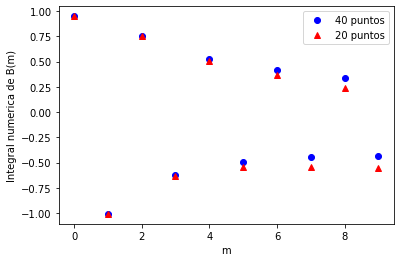

In [47]:
mpl.plot(range(10),E_40,'bo', label = '40 puntos')
mpl.plot(range(10),E_20, 'r^', label = '20 puntos')
mpl.legend()
mpl.xlabel('m')
mpl.ylabel('Integral numerica de B(m)')

 Vemos que se pierde precisión a medida que crece el orden del polinomio como era de esperarse. Ahora ya estamos en condiciones de proseguir. Chequeamos que la condición de contorno se satisfaga. Para ello sumamos los 20 primeros términos de la suma. (Vea que sucede si toma más términos).

In [64]:
N=20 # número de términos en la suma
step=lambdify(x,Sum(B_40(m).doit()*sp.legendre(2*m+1,x),(m,0,N)).doit(),"numpy")

 Graficamos la aproximación a la función escalón que calculamos:

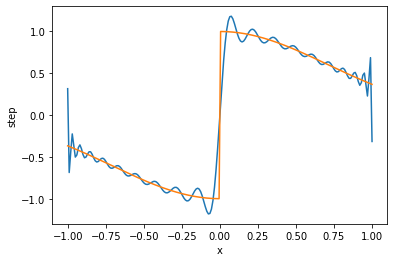

In [65]:
x_vals = np.linspace(-1, 1, 200)
z_vals = step(x_vals)
f = lambdify(x,sp.sign(x)*sp.exp(-x*x),"numpy")
f_vals = f(x_vals)
mpl.plot(x_vals, z_vals, x_vals, f_vals)
mpl.ylabel("step")
mpl.xlabel("x")
mpl.show()

Ahora calculamos una aproximación a la solución completa, también tomando 20 términos de la serie.

In [66]:
potential = lambdify((x,r),Sum(B_40(m).doit()*sp.legendre(2*m+1,x)*r**(-2*(m+1)),(m,0,N)).doit(),"numpy")

 Finalmente la graficamos:

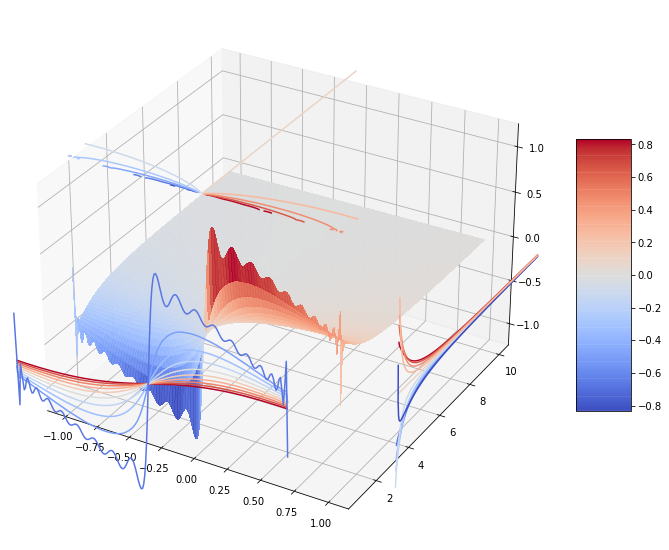

In [67]:
y_vals = np.linspace(1,10,200)
X,Y = np.meshgrid(x_vals,y_vals)
z_vals = potential(X,Y)
fig = mpl.figure(figsize = (12,10))
ax = fig.gca(projection='3d')
ax.set_zlim(-1.2, 1.2)
surf = ax.plot_surface(X,Y,z_vals, rstride=2, alpha=0.9, cstride=2, cmap=cm.coolwarm,linewidth=0, antialiased=False)
levels = np.arange(-1., 1., 0.2)
levels_y = np.arange(0.9, 2., 0.1)
cset = ax.contour(X, Y, z_vals, levels, zdir='z', offset=1.5, cmap=cm.coolwarm)
cset = ax.contour(X, Y, z_vals, levels, zdir='x', offset=1.4, cmap=cm.coolwarm)
cset = ax.contour(X, Y, z_vals, levels_y, zdir='y', offset=-2, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
mpl.show()


## Notemos que si tomamos N = 50, la grafica resulta de mala resolucin. 


Si quiere tener mejor control del gráfico (agrandarlo, rotarlo, etc.) tiene que correr la versión .py, iPython o spyder. En esos entornos se genera un gráfico (no una figura embebida como aquí)  donde se pueden hacer esas cosas.